In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

In [4]:
dataset_train = pd.read_csv('trainset.csv')

In [5]:
dataset_train.columnsa

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [7]:
train_set = dataset_train.iloc[:,1:2].values

In [8]:
type(train_set)

numpy.ndarray

In [9]:
train_set.shape

(1259, 1)

In [10]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

In [11]:
training_set_scaled.shape

(1259, 1)

In [12]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
    X_train_array.append(training_set_scaled[i-60:i,0])
    y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

In [13]:
X_train.shape

(1199, 60)

In [14]:
length = 60
n_features = 1

In [15]:
model = Sequential()
model.add(layers.SimpleRNN(10,input_shape=(length,n_features)))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train1,y_train,epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 3s 10ms/step - loss: 0.0118
Epoch 2/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0021
Epoch 3/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 4/100
38/38 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 5/100
38/38 [==============================] - 0s 7ms/step - loss: 9.7111e-04
Epoch 6/100
38/38 [==============================] - 0s 7ms/step - loss: 8.7153e-04
Epoch 7/100
38/38 [==============================] - 0s 7ms/step - loss: 7.8739e-04
Epoch 8/100
38/38 [==============================] - 0s 7ms/step - loss: 7.1602e-04
Epoch 9/100
38/38 [==============================] - 0s 8ms/step - loss: 6.9227e-04
Epoch 10/100
38/38 [==============================] - 0s 8ms/step - loss: 7.0105e-04
Epoch 11/100
38/38 [==============================] - 0s 7ms/step - loss: 6.5072e-04
Epoch 12/100
38/38 [==============================] - 0s 7ms/step - loss: 6.2313e-04
Epo

In [19]:
dataset_test = pd.read_csv('testset.csv')

In [20]:
test_set = dataset_test.iloc[:,1:2].values

In [21]:
test_set.shape

(125, 1)

In [22]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [29]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
y_test = []
for i in range(60,1384):
    X_test.append(inputs_scaled[i-60:i,0])
    y_test.append(inputs_scaled[i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [30]:
X_test.shape

(1324, 60, 1)

In [31]:
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

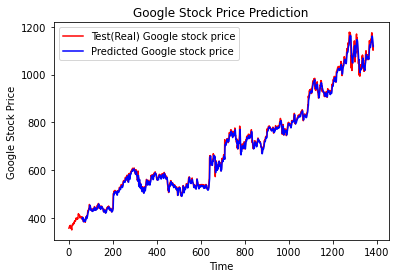

In [32]:
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test,predicted_stock_price)

533561.2839122365